# **Data Science Final Deliverable.**

Team

1) Venkata Phani Aditya Nutalapati (120158346)

2) Sai Ganesh Pendela (120386084)

3) Samba Sivesh Kurra (120127274)

4) Akash Perni (120386541)


We predicted the salary ranges, using different algorithms based on different job attributes, and found the best algorithm that best fits for the data.[link text](https://)


In [1]:
#import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Data Exploration**

In [3]:
folderName = 'drive/MyDrive/DataScience/Project/DataSet/US-SDE-DataSet.csv'
df=pd.read_csv(folderName)
df.columns

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58433 entries, 0 to 58432
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  58433 non-null  object 
 1   company                58430 non-null  object 
 2   salary                 18103 non-null  object 
 3   rating                 58433 non-null  float64
 4   review_count           58433 non-null  int64  
 5   types                  42577 non-null  object 
 6   location               58433 non-null  object 
 7   relative_time          58433 non-null  object 
 8   hires_needed           11857 non-null  object 
 9   hires_needed_exact     18439 non-null  object 
 10  urgently_hiring        58433 non-null  bool   
 11  remote_work_model      22804 non-null  object 
 12  snippet                58425 non-null  object 
 13  dradis_job             58433 non-null  bool   
 14  link                   58433 non-null  object 
 15  ne

In [5]:
df.head()

,title,company,salary,rating,review_count,types,location,relative_time,hires_needed,hires_needed_exact,...,indeed_applyable,ad_id,remote_location,source_id,hiring_event_job,indeed_apply_enabled,job_location_postal,company_overview_link,activity_date,location_extras
0,Android Developer,Shockoe,NaN,0.0,0,Full-time,"Richmond, VA",30+ days ago,NaN,NaN,...,False,NaN,False,11706594,False,False,NaN,NaN,NaN,NaN
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",0.0,0,Full-time,"Louisville, KY",30+ days ago,ONE,1,...,True,370154371.0,False,11468052,False,True,40219.0,NaN,Active 2 days ago,NaN
2,Sr. Android Developer,The Cervantes Group,NaN,4.1,22,Full-time,Remote,6 days ago,TWO_FOUR,2,...,True,NaN,False,9570478,False,True,NaN,/cmp/The-Cervantes-Group,Active 3 days ago,NaN
3,Junior Software Engineer,Medical Knowledge Group,NaN,0.0,0,Full-time,Remote,8 days ago,ONE,1,...,True,368864426.0,False,501562,False,True,NaN,NaN,Active 3 days ago,NaN
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,4.1,548,Full-time,"Kansas City, MO",2 days ago,NaN,NaN,...,False,NaN,False,1439,False,False,NaN,/cmp/Federal-Reserve-Bank-of-New-York,NaN,NaN


In [6]:
# Check amount of missing values and percentage
null_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

title                     0.000000
company                   0.005134
salary                   69.019219
rating                    0.000000
review_count              0.000000
types                    27.135352
location                  0.000000
relative_time             0.000000
hires_needed             79.708384
hires_needed_exact       68.444201
urgently_hiring           0.000000
remote_work_model        60.974107
snippet                   0.013691
dradis_job                0.000000
link                      0.000000
new_job                   0.000000
job_link                  0.000000
sponsored                 0.000000
featured_employer         0.000000
indeed_applyable          0.000000
ad_id                    59.567368
remote_location           0.000000
source_id                 0.000000
hiring_event_job          0.000000
indeed_apply_enabled      0.000000
job_location_postal      55.297520
company_overview_link    37.886126
activity_date            76.381497
location_extras     

In [7]:
# Drop columns will not be use
df = df.drop(columns = ["review_count","snippet","link","job_link","company_overview_link","ad_id","source_id",
                        "hires_needed","hires_needed_exact","activity_date","location_extras"])
df=df.drop_duplicates()
df.columns

Index(['title', 'company', 'salary', 'rating', 'types', 'location',
       'relative_time', 'urgently_hiring', 'remote_work_model', 'dradis_job',
       'new_job', 'sponsored', 'featured_employer', 'indeed_applyable',
       'remote_location', 'hiring_event_job', 'indeed_apply_enabled',
       'job_location_postal'],
      dtype='object')

## **Clean and Normalize Data**

### **Salary**
Separate salary columns into three columns- yearly, monthly,and hourly salaries. Turning values in these three columns into numerical values by counting the mean of the original columns.



In [8]:
# Functions to normalzie salaries
def normalize_yearly_salary(x):
    try:
        if x.endswith("a year"):
            yearly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(yearly_salary)):
                yearly_salary[i] = int(yearly_salary[i].replace(",", ""))
            return np.mean(yearly_salary)
    except:
        pass

def normalize_weekly_salary(x):
    try:
         if x.endswith('a week'):
            weekly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(weekly_salary)):
                weekly_salary[i] = int(weekly_salary[i].replace(",", ""))
            return np.mean(weekly_salary)
    except:
        pass

def normalize_hourly_salary(x):
    try:
         if x.endswith("an hour"):
            hourly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(hourly_salary)):
                hourly_salary[i] = int(hourly_salary[i].replace(",", ""))
            return np.mean(hourly_salary)
    except:
        pass

# Normalize salary
df["yearly_salary"] = df["salary"].apply(normalize_yearly_salary)
df["weekly_salary"] = df["salary"].apply(normalize_weekly_salary)
df["hourly_salary"] = df["salary"].apply(normalize_hourly_salary)

# **Exploratory Data Analysis**

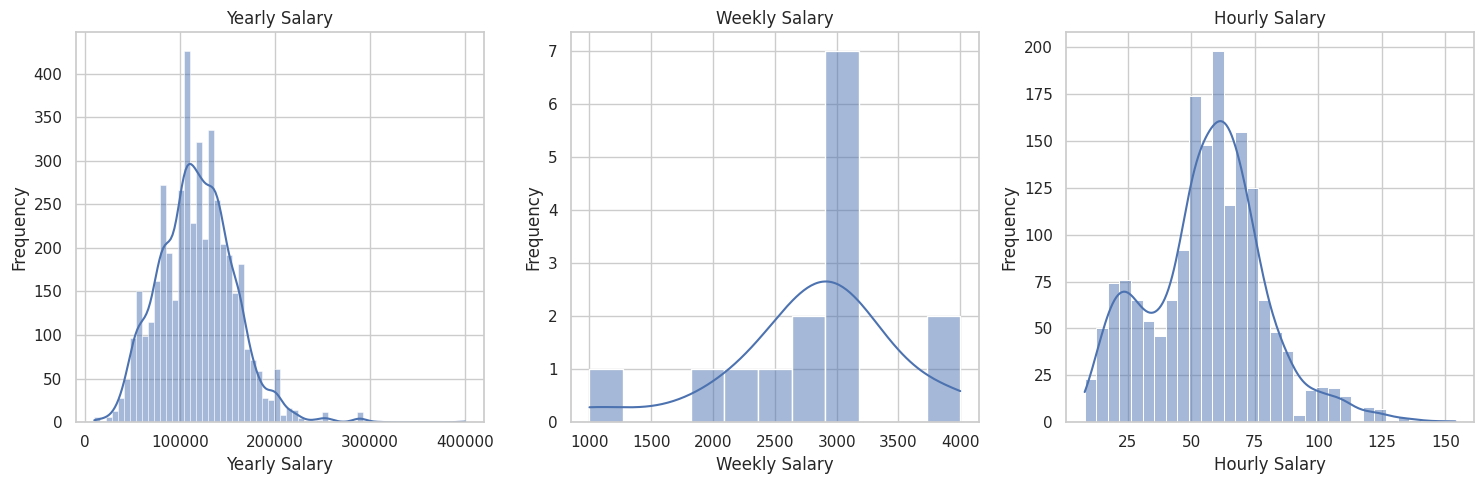

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_palette("deep")

# Create a single figure with subplots for each salary type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Yearly Salary
sns.histplot(data=df["yearly_salary"], kde=True, ax=axes[0])
axes[0].set_title("Yearly Salary")
axes[0].set_xlabel("Yearly Salary")
axes[0].set_ylabel("Frequency")

# Plot 2: Weekly Salary
sns.histplot(data=df["weekly_salary"], kde=True, ax=axes[1])
axes[1].set_title("Weekly Salary")
axes[1].set_xlabel("Weekly Salary")
axes[1].set_ylabel("Frequency")

# Plot 3: Hourly Salary
sns.histplot(data=df["hourly_salary"], kde=True, ax=axes[2])
axes[2].set_title("Hourly Salary")
axes[2].set_xlabel("Hourly Salary")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## **The Most Common Types of Jobs**

In [10]:
# plot the most commmon types of jobs
to_plot = df.types.value_counts()[:5]
# ax = to_plot.plot(kind='bar', color=sns.color_palette('Spectral'))
to_plot

Full-time                         20981
Full-time, Contract                1295
Contract                            811
Full-time, Part-time, Contract      513
Part-time, Contract                 132
Name: types, dtype: int64

More than the half of software engineers work as full-time

## **View The Most Hiring Companies**

<Axes: >

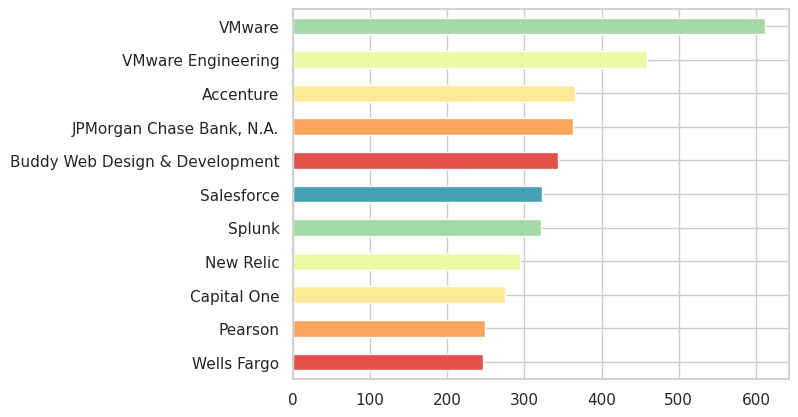

In [11]:
# plot the most hiring companies
df.company.value_counts()[10::-1].plot(kind='barh', color=sns.color_palette("Spectral"))

## **View The Most Common Jobs**

<Axes: >

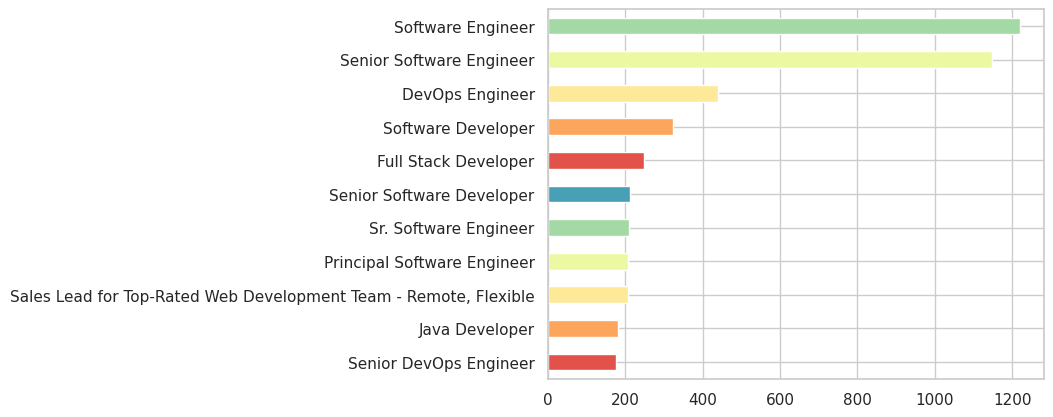

In [12]:
# plot the most common jobs
df.title.value_counts()[10::-1].plot(kind='barh', color=sns.color_palette('Spectral'))

Software Engineer jobs dominate all the other types of jobs

## **View the location of the jobs**

<Axes: >

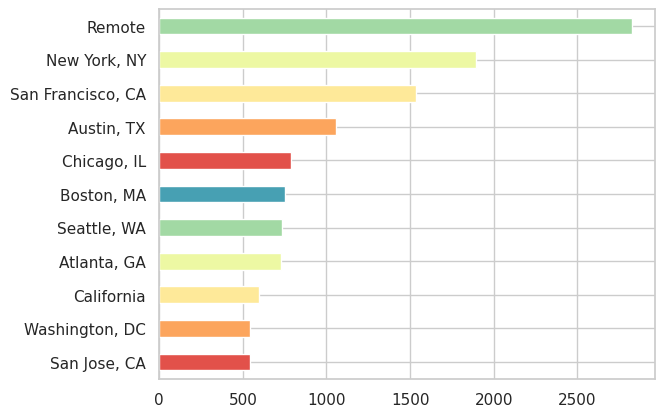

In [13]:
df.location.value_counts()[10::-1].plot(kind='barh', color=sns.color_palette('Spectral'))

**Sponsored**

Create a column with sponsored information as categorical values

In [14]:
# Function to turn boolean into sting
def categorize_sponsored(x):
    if x == True:
        x = "sponsored"
    else:
        x = "not_sponsored"
    return x
# Create a coulumns to store categorical sponsorship data
df["sponsored_categorical"] = df["sponsored"].apply(categorize_sponsored)

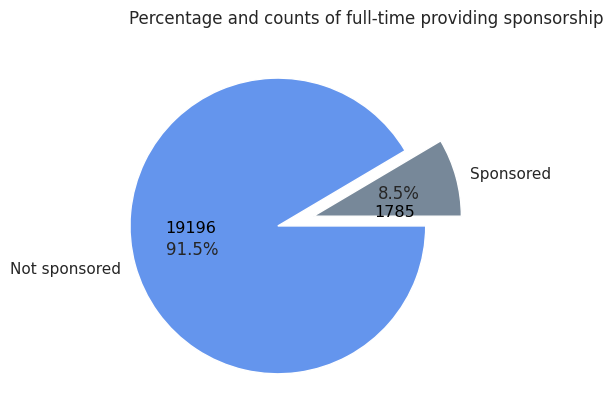

In [15]:
# Function to create list for drawing piechart
def create_list_for_piechart(dataFrame, column):
    percentage = list()
    percentage.append(len(dataFrame[dataFrame[column] == True]))
    percentage.append(len(dataFrame[dataFrame[column] == False]))

    return percentage

# Percentages of full-time jobs with sponsorship
df["full_time"] = df["types"].isin(["Full-time"])
full_time_job = df[df["full_time"]]

# Apply function to create list for drawing piechart
percentage_of_fulltime = create_list_for_piechart(full_time_job, "sponsored")

# List for counts of sponsorships
full_time_job_counts = [len(full_time_job[full_time_job["sponsored"] == True]), len(full_time_job[full_time_job["sponsored"] == False])]

plt.pie(percentage_of_fulltime, explode = (0, 0.25), labels = ["Sponsored", "Not sponsored"], autopct = "%1.1f%%", colors = ["lightslategrey", "cornflowerblue"])
plt.annotate(full_time_job_counts[0], (0.55, 0.03), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.annotate(full_time_job_counts[1], (-0.83, -0.08), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.title("Percentage and counts of full-time providing sponsorship", loc = "left")
plt.show()

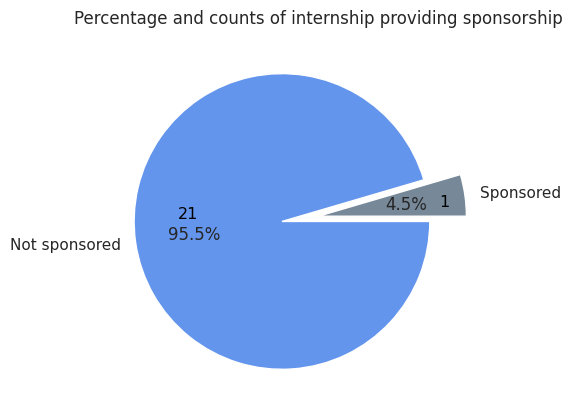

In [16]:
# Percentages of internship with sponsorship
df["Internship"] = df["types"].isin(["Internship"])
internship = df[df["Internship"]]

# Apply function to create list for drawing piechart
percentage_of_internship = create_list_for_piechart(internship, "sponsored")

# List for counts of sponsorships
internship_job_counts = [len(internship[internship["sponsored"] == True]), len(internship[internship["sponsored"] == False])]

plt.pie(percentage_of_internship, explode = (0, 0.25), labels = ["Sponsored", "Not sponsored"], autopct = "%1.1f%%", colors = ["lightslategrey","cornflowerblue"])
plt.annotate(internship_job_counts[0], (0.85, 0.1), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.annotate(internship_job_counts[1], (-0.88, 0.02), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.title("Percentage and counts of internship providing sponsorship")
plt.show()

<Axes: title={'center': 'Company provided sponsorship'}, xlabel='amounts of position'>

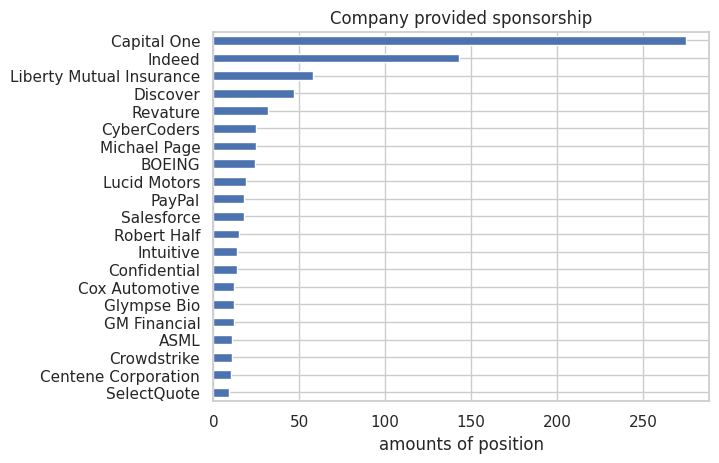

In [17]:
job_with_sponsorship = df[df["sponsored"] == True]
job_with_sponsorship["company"].value_counts()[20::-1].plot(kind = "barh", xlabel = "amounts of position", title = "Company provided sponsorship")

# **Feature Engineering**

In [18]:
df=pd.read_csv(folderName)
df.columns

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')

In [19]:
items_0 = df.shape[0]  # Stores the initial number of rows in the DataFrame
df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame
items_1 = df.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {items_0-items_1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

There are 0 duplicates found in the dataset


In [20]:
#As salary is in form of range creating new column, where salary is mid of the range
#Converting monthly,hourly and weekly salary into year by multiplying.
#Monthly is converted to yearly salary by multiplying it with 12
#Weekly is converted into yearly salary by multplying it with 52
#hourly salary is converted by multiplying it with 2080 (taking 40 hours per week of work)
#Daily salary is converted by multplying it with 220 days (taking remaining days as holidays and weekends)
def extract_salary_info(x):
  x=str(x)
  matches = re.findall(r'[\d,]+', x)
  res = '-'.join(matches).replace(',', '')
  if 'year' in x:
    if('-' in res):
      x1=int(res.split('-')[0])
      x2=int(res.split('-')[1])
      return (x1+x2)/2
    else:
      return int(res)
  elif 'week' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*52
      x2=int(res.split('-')[1])*52
      return (x1+x2)/2
    else:
      return int(res)*52
  elif 'month' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*12
      x2=int(res.split('-')[1])*12
      return (x1+x2)/2
    else:
      return int(res)*12
  elif 'hour' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*2080
      x2=int(res.split('-')[1])*2080
      return (x1+x2)/2
    else:
      return int(res)*2080
  elif 'day' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*220
      x2=int(res.split('-')[1])*220
      return (x1+x2)/2
    else:
      return int(res)*300

In [21]:
df['salary'] = df['salary'].apply(extract_salary_info)

In [22]:
#Filling null values of salary by taking mean salary with similar job,company and location
average_salary_title_company_location = df.groupby(['title','company','location'])['salary'].transform('mean')
df['salary'] = df['salary'].fillna(average_salary_title_company_location)
df= df.dropna(subset=['salary'])

In [23]:
# selecting required columns for building the models
selected_cols = ['salary', 'title', 'company','rating','review_count',
       'location','relative_time',
       'urgently_hiring', 'dradis_job','snippet',
       'new_job', 'sponsored', 'featured_employer','indeed_applyable','source_id','indeed_apply_enabled']
df=df[selected_cols]

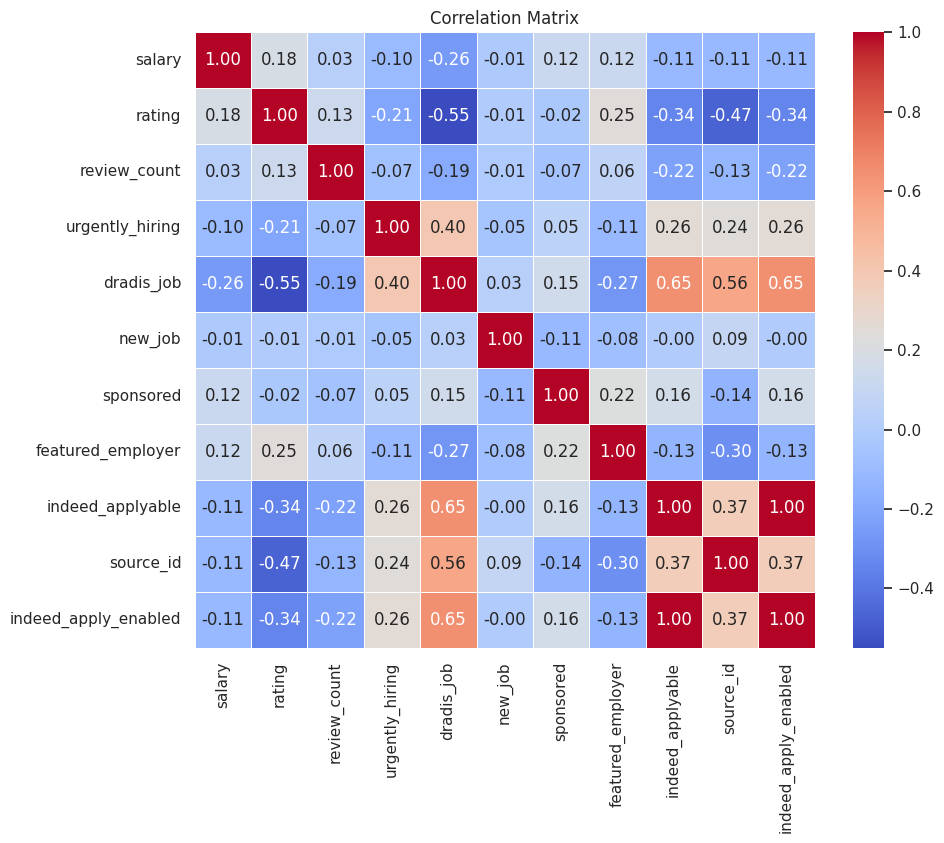

In [24]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [25]:
# Function to get the embedding for a column
def get_embedding(x):
    words = x.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * model.vector_size

In [26]:
#Word encoding job title with wodr2vec package
# Using Word2Vec for encoding in a DataFrame involves applying the Word2Vec model to convert textual data into numerical vectors and then incorporating these vectors into a DataFrame.
model = Word2Vec(sentences=[job.split() for job in df['title']], vector_size=50, window=3, min_count=1, workers=4)
# Creating columns for each dimension of the embedding
embedding_columns = [f'JobTitle_{i}' for i in range(model.vector_size)]
df[embedding_columns] = pd.DataFrame(df['title'].apply(get_embedding).tolist(), index=df.index)
df = df.drop(columns=['title'])

In [27]:
#Word encoding company name with wodr2vec package
# Train Word2Vec model
model = Word2Vec(sentences=[job.split() for job in df['company']], vector_size=50, window=3, min_count=1, workers=4)
# Creating columns for each dimension of the embedding
embedding_columns = [f'company_{i}' for i in range(model.vector_size)]
df[embedding_columns] = pd.DataFrame(df['company'].apply(get_embedding).tolist(), index=df.index)
df = df.drop(columns=['company'])

In [28]:
#Encoding job location based on its frequency in dataset
# Calculate frequency of each job title
title_counts = df['location'].value_counts()
# Map job titles to their frequency
df['location_Frequency'] = df['location'].map(title_counts)
df=df.drop(columns=['location'])

In [29]:
#Getting number of days the job has been posted using relative_time column
def getDays(x):
  pattern = re.compile(r'(\d+)(?:\s*\+*\s*days* ago)', re.IGNORECASE)
  # Search for the pattern in the input string
  match = pattern.search(x)
  # If a match is found, return the extracted number of days, otherwise return 0
  if match:
      return int(match.group(1))
  else:
      return 0
df['relative_days']=df['relative_time'].apply(getDays)
df=df.drop(columns=['relative_time'])

In [30]:
#Getting years of experience required for job from job description.
#If no years of experience mentioned assuming it as a fresher job
def yoeExperience(x):
  if('years' in x):
    l = x.split("years")
    p = l[0].split()
    years=p[len(p)-1]
    year = years[0]
    if(year.isnumeric()):
      return int(year)
    else:
      return 0
  else:
    return 0

df['yoe']=df['snippet'].apply(yoeExperience)
df=df.drop(columns=['snippet'])

In [31]:
df.head()

,salary,rating,review_count,urgently_hiring,dradis_job,new_job,sponsored,featured_employer,indeed_applyable,source_id,...,company_43,company_44,company_45,company_46,company_47,company_48,company_49,location_Frequency,relative_days,yoe
1,50000.0,0.0,0,True,True,False,True,False,True,11468052,...,-0.109740,0.476117,-0.044156,-0.215409,-0.079454,0.101167,0.260524,37,30,3
7,150000.0,0.0,0,False,True,True,True,False,True,18658572,...,-0.094654,0.394334,-0.038556,-0.172344,-0.064265,0.087956,0.152845,56,5,3
13,156000.0,4.0,8633,False,False,False,False,False,False,13116,...,-0.032842,0.111762,-0.006672,-0.074056,-0.027085,0.029157,0.053653,21,30,0
14,36400.0,0.0,0,True,True,False,True,False,True,19803895,...,-0.100860,0.495369,-0.054547,-0.196314,-0.083631,0.100488,0.211821,13,27,2
17,147500.0,0.0,0,False,True,True,True,False,True,17458434,...,-0.013274,0.065865,-0.013578,-0.021198,-0.003625,0.014206,0.024372,119,1,0


In [32]:
#Converting salary into bins for to build classification models
# Defining bins and labels
bins = [0,100000,200000,300000,400000]
labels = ['Bin 1', 'Bin 2', 'Bin 3','Bin 4']

# Createing a new column with the discretized target variable
df['salary_bin'] = pd.cut(df['salary'], bins=bins, labels=labels, include_lowest=True)

In [33]:
# Drop the original continuous target variable
df = df.drop('salary', axis=1)

# Split the data into features and target
X = df.drop('salary_bin', axis=1)
y = df['salary_bin']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Model Building**

Accuracy: 0.6901098901098901
Classification Report:
               precision    recall  f1-score   support

       Bin 1       0.00      0.00      0.00      1031
       Bin 2       0.69      1.00      0.82      2512
       Bin 3       0.00      0.00      0.00        96
       Bin 4       0.00      0.00      0.00         1

    accuracy                           0.69      3640
   macro avg       0.17      0.25      0.20      3640
weighted avg       0.48      0.69      0.56      3640



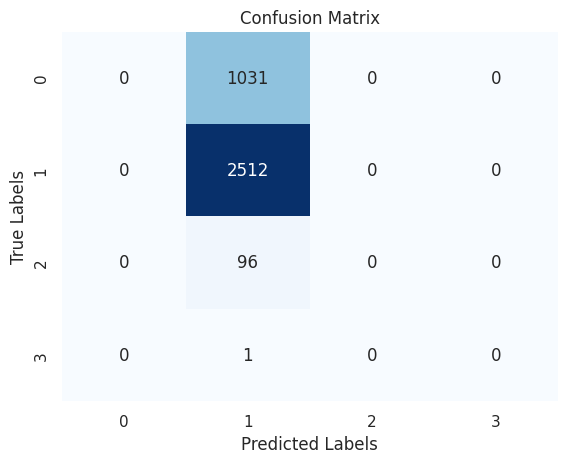

Precision: 0.1725
Recall: 0.2500
F1 Score: 0.2042
Average Accuracy:	0.6911

Standard Deviation:	0.0003



In [34]:
# Creating Logistic Regression Model and train the model
model = LogisticRegression(max_iter=7600, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
LRACC = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

LRprecision = precision_score(y_test, y_pred, average='macro')
LRrecall = recall_score(y_test, y_pred, average='macro')
LRf1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {LRprecision:.4f}")
print(f"Recall: {LRrecall:.4f}")
print(f"F1 Score: {LRf1:.4f}")

res = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
lR_AC=res.mean()
LR_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))


Accuracy: 0.903021978021978
Classification Report:
               precision    recall  f1-score   support

       Bin 1       0.84      0.85      0.84      1031
       Bin 2       0.93      0.93      0.93      2512
       Bin 3       0.80      0.77      0.78        96
       Bin 4       0.20      1.00      0.33         1

    accuracy                           0.90      3640
   macro avg       0.69      0.89      0.72      3640
weighted avg       0.90      0.90      0.90      3640



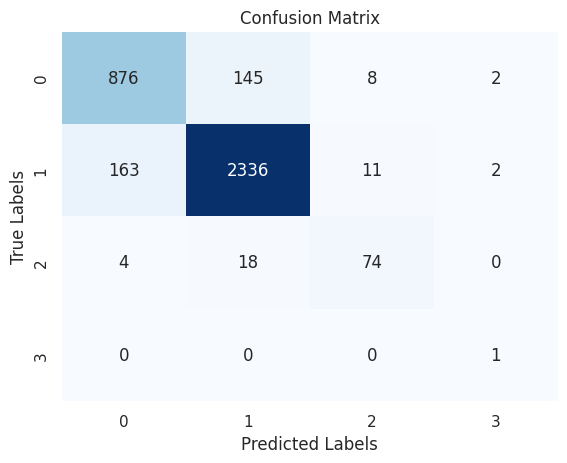

Precision: 0.6926
Recall: 0.8876
F1 Score: 0.7234
Average Accuracy:	0.9038

Standard Deviation:	0.0086



In [35]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
DTaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DTaccuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
DTprecision = precision_score(y_test, y_pred, average='macro')
DTrecall = recall_score(y_test, y_pred, average='macro')
DTf1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {DTprecision:.4f}")
print(f"Recall: {DTrecall:.4f}")
print(f"F1 Score: {DTf1:.4f}")

#cross validation
res = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
DT_AC=res.mean()
DT_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

Accuracy: 0.9337912087912088
Classification Report:
               precision    recall  f1-score   support

       Bin 1       0.94      0.84      0.89      1031
       Bin 2       0.93      0.98      0.95      2512
       Bin 3       0.99      0.76      0.86        96
       Bin 4       1.00      1.00      1.00         1

    accuracy                           0.93      3640
   macro avg       0.96      0.90      0.93      3640
weighted avg       0.93      0.93      0.93      3640



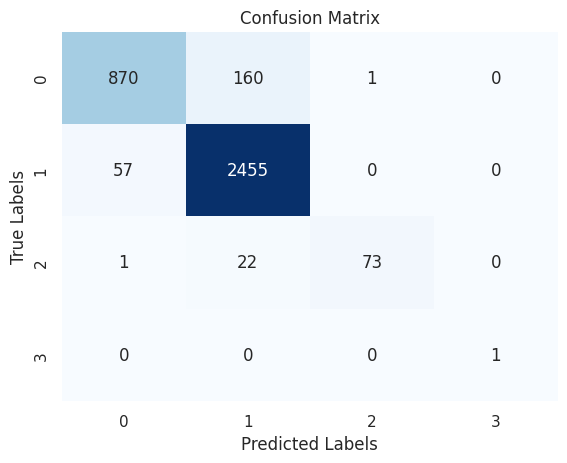

Precision: 0.9637
Recall: 0.8954
F1 Score: 0.9252
Average Accuracy:	0.9336

Standard Deviation:	0.0053



In [36]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
RTaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", RTaccuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
RTprecision = precision_score(y_test, y_pred, average='macro')
RTrecall = recall_score(y_test, y_pred, average='macro')
RTf1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {RTprecision:.4f}")
print(f"Recall: {RTrecall:.4f}")
print(f"F1 Score: {RTf1:.4f}")

#cross validation
res = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
RF_AC=res.mean()
RF_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

Accuracy: 0.904945054945055

Confusion Matrix:
 [[ 900  131    0    0]
 [ 180 2329    3    0]
 [   1   30   65    0]
 [   1    0    0    0]]


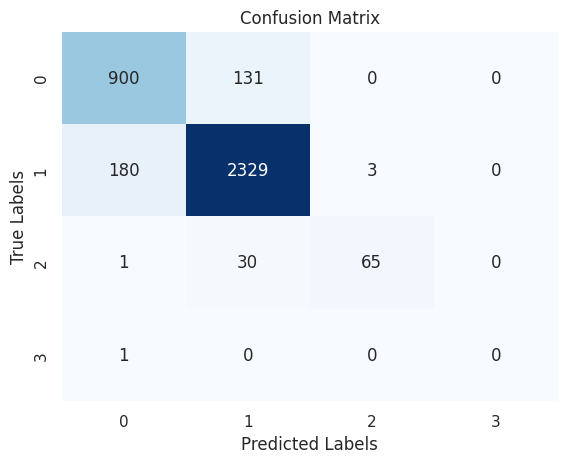

Precision: 0.6808
Recall: 0.6193
F1 Score: 0.6439
Average Accuracy:	0.8856

Standard Deviation:	0.0112



In [37]:
# Create a KNN Classifier
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the classifier
knn.fit(X_train_std, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_std)

# Evaluate the performance
KNNaccuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", KNNaccuracy)
print("\nConfusion Matrix:\n", confusion_mat)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
KNNprecision = precision_score(y_test, y_pred, average='macro')
KNNrecall = recall_score(y_test, y_pred, average='macro')
KNNf1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {KNNprecision:.4f}")
print(f"Recall: {KNNrecall:.4f}")
print(f"F1 Score: {KNNf1:.4f}")

#cross validation
res = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
KNN_AC=res.mean()
KNN_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

In [38]:
metrics={
    'MODELS':['LogisticRegression','Decision Tree','Random Forest','KNN'],
    'ACCURACY':[LRACC,DTaccuracy,RTaccuracy,KNNaccuracy],
    'PRECISION':[LRprecision,DTprecision,RTprecision,KNNprecision],
    'RECALL':[LRrecall,DTrecall,RTrecall,KNNrecall],
    'F1 SCORE':[LRf1,DTf1,RTf1,KNNf1],
    'AVERAGE ACCURACY':[lR_AC,DT_AC,RF_AC,KNN_AC],
    'STANDARAD DEVIATION':[LR_SD,DT_SD,RF_SD,KNN_SD]
}
metricsDF = pd.DataFrame(metrics)
metricsDF

,MODELS,ACCURACY,PRECISION,RECALL,F1 SCORE,AVERAGE ACCURACY,STANDARAD DEVIATION
0,LogisticRegression,0.690110,0.172527,0.250000,0.204161,0.691145,0.000265
1,Decision Tree,0.903022,0.692589,0.887608,0.723374,0.903757,0.008557
2,Random Forest,0.933791,0.963742,0.895392,0.925154,0.933573,0.005334
3,KNN,0.904945,0.680754,0.619293,0.643945,0.885624,0.011242


# Conclusion


After performing feature engineering and building models for the dataset we conclude that:

1) Random Forest Classifier works best among all the models with 93% Accuracy

2) LogisticRegression Model performed poorly among all the models with 69% accuracy

3) Although Decision Tree and KNN have accuracy greater than 90%, Random Forest had better Precision, Recall, F1 score, Average accuracy and standard deviation then these models.

